In this project, we will learn:

1 - How to create Morlet wavelets

2 - How to perform convolution

3 - How to create a time-frequency plot (Spectrogram)

## Real-valued Morlet Wavelets

The function of Real-Value Morlet Wavelets Convolution is defined as: 
$y = cos(2\pi ft)exp( \frac{-4log(2)t^2}{w^2})$ where $f = 5, w = 0.5$

f is frequency in hertz and t is a time vector given in seconds. w is the width parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# define the functions
def createRealWavelets(time, freq, fwhm):
    """
    time: time vector in seconds
    freq: Frequency in Hertz
    fwhm: full-width at half maximum (w)
    """
    sinepart = np.cos(2*np.pi*freq*time)
    gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
    return sinepart*gauspart

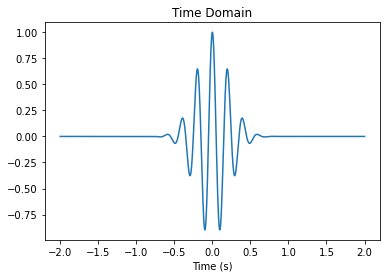

In [3]:
# Parameters to create the wavelet
freq = 5
fwhm = 0.5
srate = 500
time = np.arange(-2*srate,2*srate +1/srate)/srate
npnts = len(time)

# create wavelet
wavelet = createRealWavelets(time, freq, fwhm)

plt.plot(time, wavelet)
plt.xlabel("Time (s)")
plt.title("Time Domain")
plt.show()

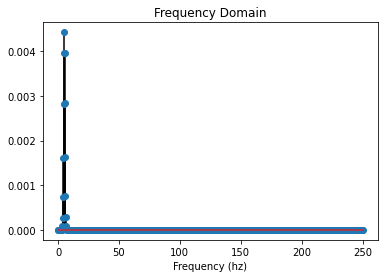

In [4]:
# Get the Power spectrum of the wavelet
waveletX = np.abs(np.fft.fft(wavelet/npnts))**2
hz = np.linspace(0, srate/2, int(npnts/2+1))
plt.stem(hz, waveletX[:len(hz)], "k", use_line_collection = True)
plt.xlabel("Frequency (hz)")
plt.title("Frequency Domain")
plt.show()

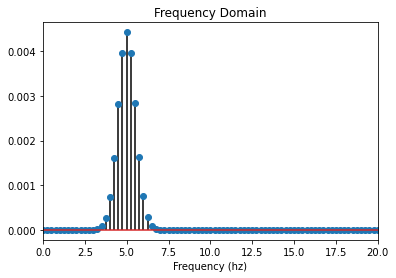

In [5]:
plt.stem(hz, waveletX[:len(hz)], "k", use_line_collection = True)
plt.xlim([0,20])
plt.xlabel("Frequency (hz)")
plt.title("Frequency Domain")
plt.show()

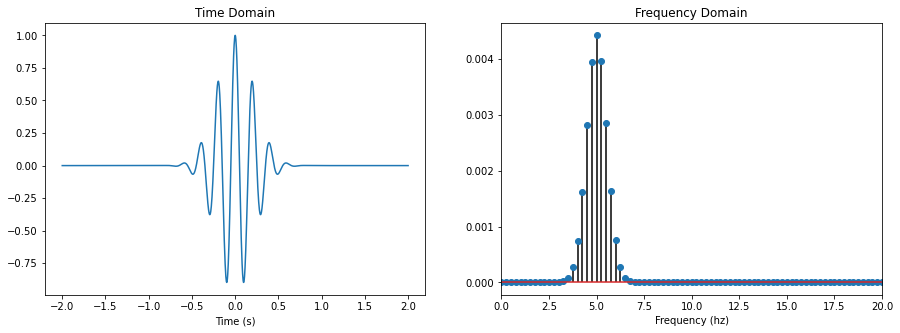

In [6]:
# plot both figures Side by Side
fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(time, wavelet)
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Time Domain")

ax[1].stem(hz, waveletX[:len(hz)], "k", use_line_collection = True)
ax[1].set_xlim([0,20])
ax[1].set_xlabel("Frequency (hz)")
ax[1].set_title("Frequency Domain")
plt.show()

## Complex-Valued Morlet Wavelets

The function of Complex Morlet Wavelets Convolution is defined as: 
$y = exp(i2\pi ft)exp( \frac{-4log(2)t^2}{w^2})$ where $f = 5, w = 0.5, i = \sqrt{-1}$

f is frequency in hertz and t is a time vector given in seconds. w is the width parameters.

In [7]:
def createComplexWavelets(time, freq, fwhm):
    """
    time: time vector in seconds
    freq: Frequency in Hertz
    fwhm: full-width at half maximum (w)
    """
    sinepart = np.exp(1j*2*np.pi*freq*time)
    gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
    return sinepart*gauspart

In [8]:
freq = 5
fwhm = 0.5
srate = 500
time = np.arange(-2*srate,2*srate +1/srate)/srate
npnts = len(time)

wavelet = createComplexWavelets(time, freq, fwhm)

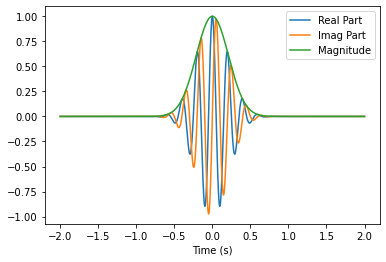

In [9]:
plt.plot(time, np.real(wavelet), label = "Real Part")
plt.plot(time, np.imag(wavelet), label = "Imag Part")
plt.plot(time, np.abs(wavelet), label = "Magnitude")
plt.legend()
plt.xlabel("Time (s)")
plt.show()

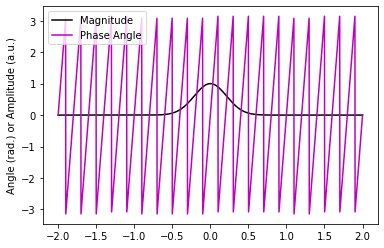

In [10]:
plt.plot(time, np.abs(wavelet), "k", label = "Magnitude")
plt.plot(time, np.angle(wavelet), "m", label = "Phase Angle")
plt.legend()
plt.ylabel("Angle (rad.) or Amplitude (a.u.)")
plt.show()

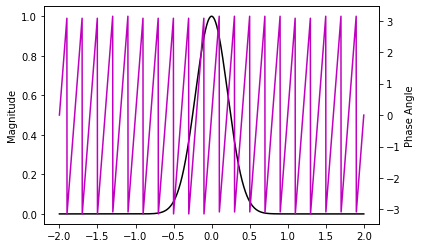

In [11]:
# Plot them on the same graph but with different y-axis
fig,ax = plt.subplots(1)
ax.plot(time, np.abs(wavelet), "k")
ax.set_ylabel("Magnitude")
ax2 = ax.twinx()
ax2.plot(time, np.angle(wavelet), "m")
ax2.set_ylabel("Phase Angle")
plt.show()

## Create a Wavelet Family

In [12]:
# Define a number of parameters
lofreq  = 2  # Lowest Frequency Value
hifreq  = 80 # Highest Frequency Value
numfrex = 42 # Number 
npnts = len(time)

frex = np.linspace(lofreq, hifreq, numfrex)
fwhms = np.linspace(1,1,numfrex)

In [13]:
# Create a family of wavelets
# initialize
wavelet_fam = np.zeros((numfrex, npnts), dtype=complex)
for wi in range(numfrex):
    wavelet_fam[wi,:] = createComplexWavelets(time, frex[wi], fwhms[wi])

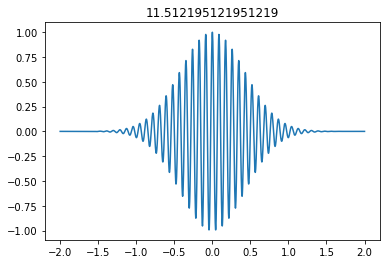

In [14]:
plt.plot(time, np.real(wavelet_fam[5,:]))
plt.title(str(frex[5]));

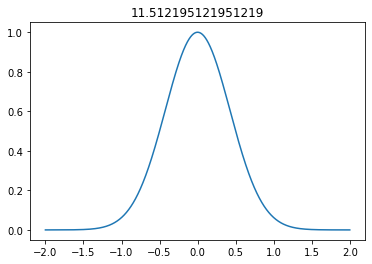

In [15]:
# Plot the Magnitude
plt.plot(time, np.abs(wavelet_fam[5,:]))
plt.title(str(frex[5]));

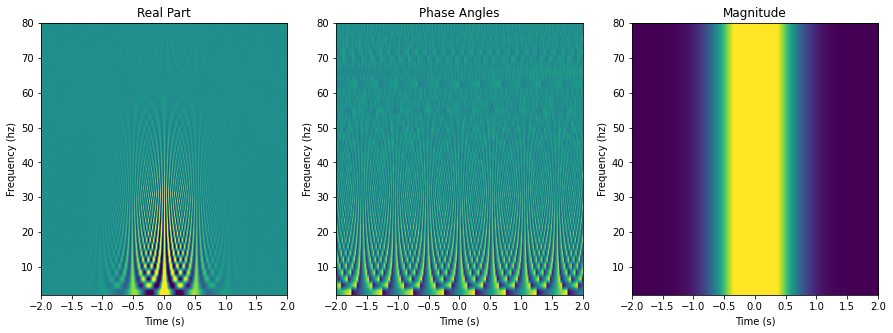

In [16]:
fig,ax = plt.subplots(1,3, figsize = (15,5))

# Show the real part
ax[0].imshow(np.real(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=-0.7, vmax=0.7)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Frequency (hz)")
ax[0].set_title("Real Part")

# Show the Angle
ax[1].imshow(np.angle(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=-3, vmax=3)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Frequency (hz)")
ax[1].set_title("Phase Angles")

# Show the Magnitude
ax[2].imshow(np.abs(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=0, vmax=0.7)
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Frequency (hz)")
ax[2].set_title("Magnitude")

plt.show()

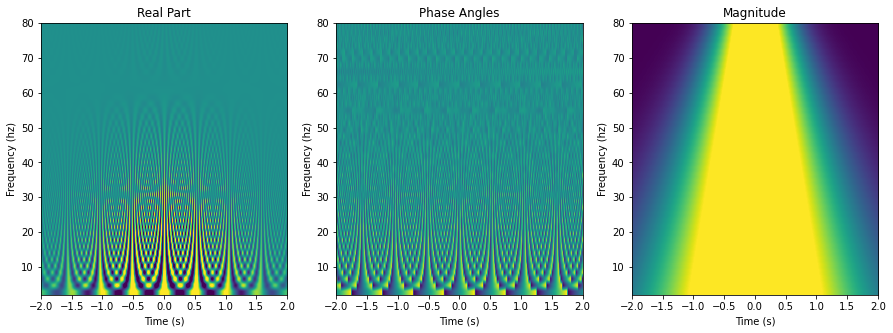

In [17]:
# To change the third figure
frex = np.linspace(lofreq, hifreq, numfrex)
fwhms = np.linspace(3,1,numfrex)
wavelet_fam = np.zeros((numfrex, npnts), dtype=complex)
for wi in range(numfrex):
    wavelet_fam[wi,:] = createComplexWavelets(time, frex[wi], fwhms[wi])
    
fig,ax = plt.subplots(1,3, figsize = (15,5))

# Show the real part
ax[0].imshow(np.real(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=-0.7, vmax=0.7)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Frequency (hz)")
ax[0].set_title("Real Part")

# Show the Angle
ax[1].imshow(np.angle(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=-3, vmax=3)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Frequency (hz)")
ax[1].set_title("Phase Angles")

# Show the Magnitude
ax[2].imshow(np.abs(wavelet_fam),aspect="auto", origin="lower",
            extent=[time[0],time[-1],lofreq,hifreq],
            vmin=0, vmax=0.7)
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Frequency (hz)")
ax[2].set_title("Magnitude")

plt.show()

## Import and Visualize EEG Data

In [18]:
# Import sampleEEGdata.mat data file
EEG = loadmat("sampleEEGdata.mat")
# I dont udnerstand this domain at all

In [19]:
# Extract the necessary information
times = np.squeeze(EEG["EEG"][0][0][14])
data = EEG["EEG"][0][0][15]
fs = EEG["EEG"][0][0][11][0][0].astype(int) # sampling rate

In [20]:
print(fs)
print(np.shape(times))
print(np.shape(data))

256
(640,)
(64, 640, 99)


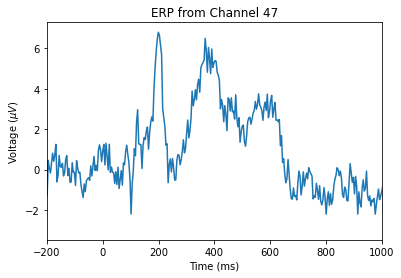

In [21]:
# Create the event-related potential (ERP)
erp = np.mean(data[46,:,:], axis=1) 
# it is a 2d matrix because we took channel 47

plt.plot(times, erp)
plt.xlim([-200, 1000]) # Zoom in
plt.xlabel("Time (ms)")
plt.ylabel("Voltage ($\mu V$)")
plt.title("ERP from Channel 47")
plt.show()

## Wavelet Convolution

In [22]:
# Define a number of parameters
lofreq  = 2
hifreq  = 30
numfrex = 42 # Number 
time = np.arange(-fs, fs+1)/fs

frex = np.linspace(lofreq, hifreq, numfrex)
fwhms = np.linspace(1,0.5,numfrex)

# Initialize
wavelet_fam = np.zeros((numfrex, len(time)), dtype=complex)

for wi in range(numfrex):
    wavelet_fam[wi,:] = createComplexWavelets(time, frex[wi], fwhms[wi])

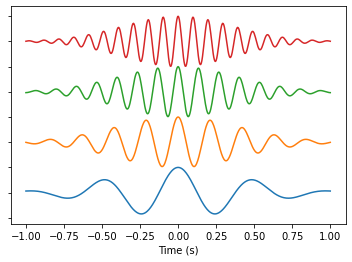

In [23]:
# Plot some selected wavelets
for i in range(4):
    plt.plot(time, np.real(wavelet_fam[i*4,:])+i*2)
plt.xlabel("Time (s)")
#plt.yticks([])
plt.tick_params(labelleft = False)#,labelbottom =False
plt.show()

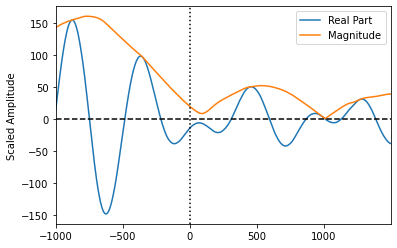

In [24]:
# Convolution
convres = np.convolve(erp, wavelet_fam[0,:], mode="same")
plt.plot(times, np.real(convres), label="Real Part")
plt.plot(times, np.abs(convres), label="Magnitude")
plt.plot([times[0], times[-1]],[0,0],"k--")
ylim = plt.ylim()
plt.plot([0,0],ylim,"k:")
plt.xlim([times[0], times[-1]])
plt.ylim(ylim)
plt.legend()
plt.ylabel("Scaled Amplitude")
plt.show()

## Create Time-Frequency Map

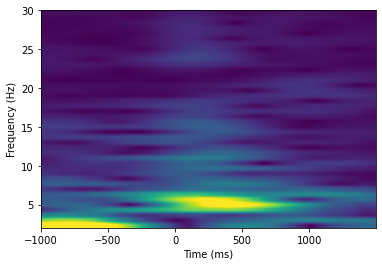

In [25]:
# Initialize a matrix
tf = np.zeros((numfrex, len(times))) # no more complex results

# loop over frequencies to implement convolution
for wi in range(numfrex):
    # Run convolution
    convres = np.convolve(erp, wavelet_fam[wi,:], mode="same")
    # store it
    tf[wi,:] = np.abs(convres)

# Create the image
plt.imshow(tf, origin="lower",aspect="auto", vmax=np.max(tf)*0.7,
          extent=[times[0], times[-1],lofreq,hifreq])
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.show()

## Phase Map with Circular Colormap

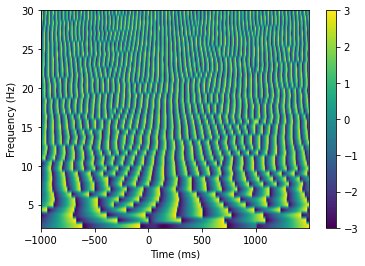

In [26]:
# Initialize a matrix
phases = np.zeros((numfrex, len(times))) # no more complex results

# loop over frequencies to implement convolution
for wi in range(numfrex):
    # Run convolution
    convres = np.convolve(erp, wavelet_fam[wi,:], mode="same")
    # store it
    phases[wi,:] = np.angle(convres)

# Create the image
plt.imshow(phases, origin="lower",aspect="auto",vmin=-3, vmax=3,
          extent=[times[0], times[-1],lofreq,hifreq])
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.show()

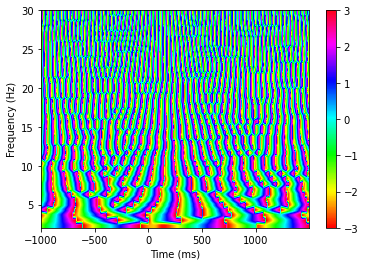

In [27]:
plt.imshow(phases, origin="lower",aspect="auto",vmin=-3, vmax=3,
          extent=[times[0], times[-1],lofreq,hifreq],
          cmap="hsv")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.show()